<h2><a href="https://leetcode.com/problems/course-schedule">207. Course Schedule</a></h2><h3>Medium</h3><hr><p>There are a total of <code>numCourses</code> courses you have to take, labeled from <code>0</code> to <code>numCourses - 1</code>. You are given an array <code>prerequisites</code> where <code>prerequisites[i] = [a<sub>i</sub>, b<sub>i</sub>]</code> indicates that you <strong>must</strong> take course <code>b<sub>i</sub></code> first if you want to take course <code>a<sub>i</sub></code>.</p>

<ul>
	<li>For example, the pair <code>[0, 1]</code>, indicates that to take course <code>0</code> you have to first take course <code>1</code>.</li>
</ul>

<p>Return <code>true</code> if you can finish all courses. Otherwise, return <code>false</code>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> numCourses = 2, prerequisites = [[1,0]]
<strong>Output:</strong> true
<strong>Explanation:</strong> There are a total of 2 courses to take. 
To take course 1 you should have finished course 0. So it is possible.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> numCourses = 2, prerequisites = [[1,0],[0,1]]
<strong>Output:</strong> false
<strong>Explanation:</strong> There are a total of 2 courses to take. 
To take course 1 you should have finished course 0, and to take course 0 you should also have finished course 1. So it is impossible.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= numCourses &lt;= 2000</code></li>
	<li><code>0 &lt;= prerequisites.length &lt;= 5000</code></li>
	<li><code>prerequisites[i].length == 2</code></li>
	<li><code>0 &lt;= a<sub>i</sub>, b<sub>i</sub> &lt; numCourses</code></li>
	<li>All the pairs prerequisites[i] are <strong>unique</strong>.</li>
</ul>


# Topological Sort 
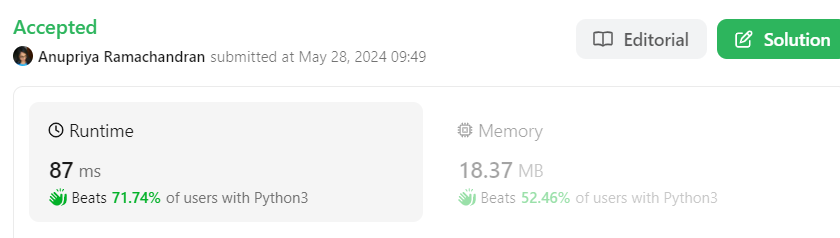

In [3]:
from collections import deque
from typing import List

class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        # construct adj list
        adj = defaultdict(list)
        for a, b in prerequisites:
            adj[a].append(b)


        indegree = [0]* numCourses
        for i in range(numCourses):
            for prereq in adj[i]:
                indegree[prereq] += 1
        
        queue = deque()
        for i in range(numCourses):
            if indegree[i] ==0:
                queue.append(i)

        count = 0
        while queue:
            course = queue.popleft()
            count += 1

            for child in adj[course]:
                indegree[child] -= 1
                if indegree[child] == 0:
                    queue.append(child)

        
        if count== numCourses:
            return True

        return False